# K-Means Clustering

Implements the K-means clustering algorithm and testing code on simple test data.

**Ruby Nunez**

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

import kmeans

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

### Import and visualize `super_simple` data

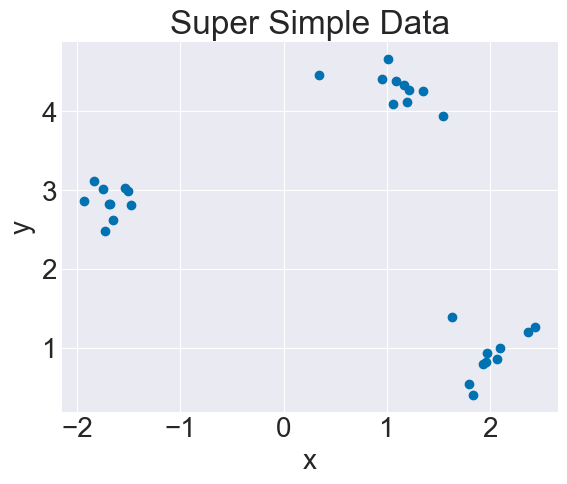

In [11]:
import pandas as pd

# Load in `super_simple.csv`
df = pd.read_csv('data/super_simple.csv')

# Convert the Dataframe to a ndarray.
super_simple = df.values
x = super_simple[:, 0]
y = super_simple[:, 1]

# Create a scatter plot below to visualize data.
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Super Simple Data')
plt.show()

### Test K-means methods

Scatterplot with each data sample color-coded based on the cluster it belongs to. Testing on the `super_simple` data.

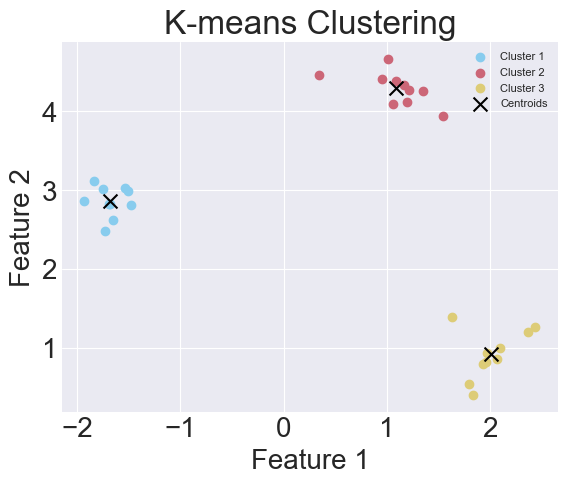

In [24]:
# Create an instance of the KMeans class with the input data 'super_simple'
cluster = kmeans.KMeans(super_simple)

# Get a copy of the data from the KMeans object
super_simple_cpy = cluster.get_data()

# Calculate the distances from a test point to the given test centroids
test_pt = np.array([[1, 2]])
cluster.dist_pt_to_centroids(test_pt.flatten(), test_centroids)

# Specify the number of clusters for initialization
test_k = 3

# Initialize the centroids randomly from the data for the given number of clusters
init_centroids = cluster.initialize(test_k)

# Assign data points to the nearest centroids, producing cluster labels
new_labels = cluster.update_labels(init_centroids)

# Update the centroids based on the mean of data points assigned to each cluster
# Also calculate the difference between new centroids and previous centroids
new_centroids, diff_from_prev_centroids = cluster.update_centroids(test_k, new_labels, init_centroids)

# Set the desired number of clusters for the clustering process
k = 3

# Perform the clustering process with the specified number of clusters
cluster.cluster(k=k)

# Plot the data points and centroids to visualize the clusters
cluster.plot_clusters()

# Display the plot
plt.show()


### Determining the number of clusters $k$

Elbow plot below for the `super_simple` dataset.

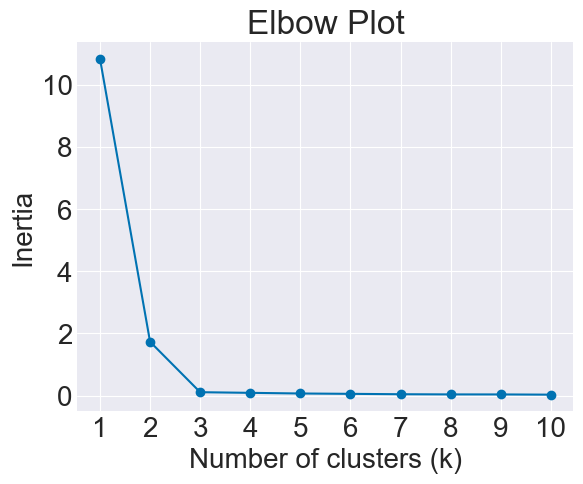

In [25]:
max_k = 10
cluster.elbow_plot(max_k)
plt.show()

#### Clustering the `five_blobs` dataset

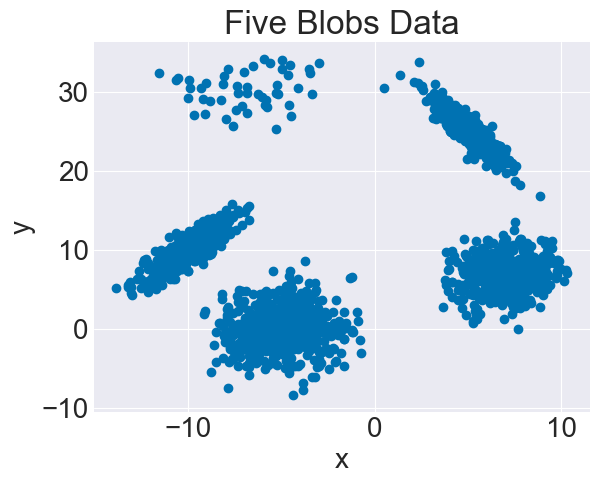

In [26]:
df = pd.read_csv('data/five_blobs.csv')

five_blobs = df.values
x = five_blobs[:, 0]
y = five_blobs[:, 1]

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Five Blobs Data')
plt.show()

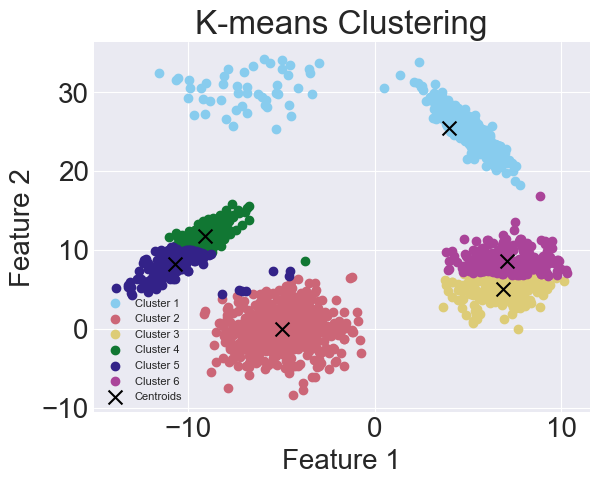

In [27]:
# place before you cluster the dataset
np.random.seed(2)

k=6

five_blobs_cluster = kmeans.KMeans(five_blobs)
blobs_init_centroids = five_blobs_cluster.initialize(k)
blobs_new_labels = five_blobs_cluster.update_labels(blobs_init_centroids)
blobs_new_centroids, blobs_diff_from_prev_centroids = five_blobs_cluster.update_centroids(test_k, blobs_new_labels, blobs_init_centroids)
five_blobs_cluster.cluster(k=k)
five_blobs_cluster.plot_clusters()

plt.show()



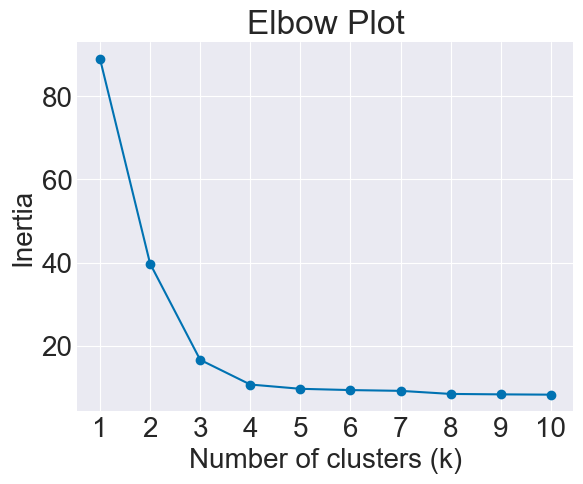

In [28]:
max_k = 10
five_blobs_cluster.elbow_plot(max_k)
plt.show()

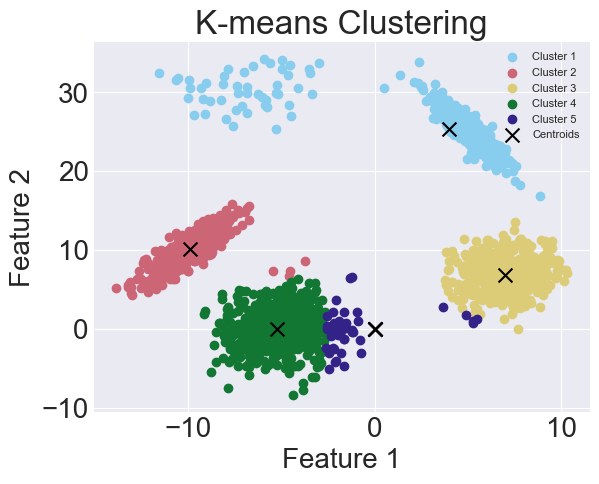

In [64]:
# place before batch cluster on the dataset
np.random.seed(2)

k = 4
iterations = 10
five_blobs_cluster.cluster_batch(k=k, n_iter=iterations)
five_blobs_cluster.plot_clusters()
plt.show()

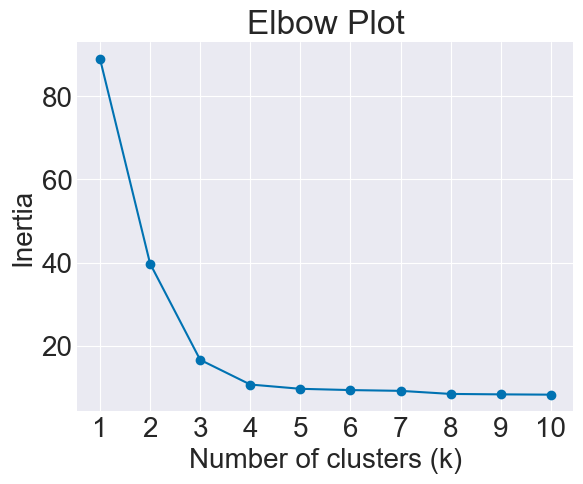

In [29]:
# Set the seed for reproducibility
np.random.seed(0)

max_k = 10
n_iter = 20
five_blobs_cluster.elbow_plot(max_k, n_iter=n_iter)

## Image Segmentation and compression

Apply K-means to one image and to compress it (*image compression*). Find $k$ RGB color centroids in the image, then replace each pixel in the image with the nearest centroid. Compress an image, by only using $k$ colors to represent it.

### Load in baby bird image

In [28]:
from matplotlib.image import imread

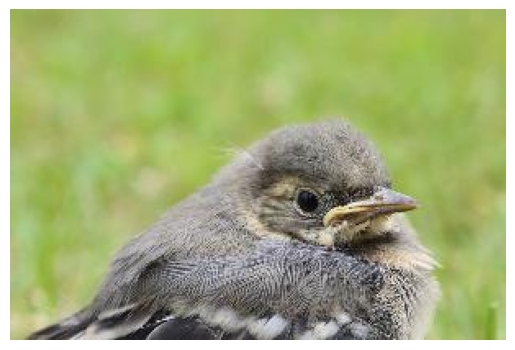

In [29]:
baby_bird_image = imread('data/baby_bird.jpeg')

plt.imshow(baby_bird_image)
plt.axis("off")
plt.show()

### Preprocess image

In [30]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''

    num_rows, num_cols, rgb = img.shape    
    flattened_img = img.reshape(num_rows * num_cols, rgb)
    
    return flattened_img

flattened_image = flatten(baby_bird_image)

### Cluster RGB values in image

- Run K-means on the bird data vector.
- Implement `replace_color_with_centroid`: replace every pixel in the image with the nearest centroid RGB value.
- Compress the image by running `replace_color_with_centroid`.

In [31]:
np.random.seed(0)

k=50
bird_image = kmeans.KMeans(flattened_image)
bird_image_init_centroids = bird_image.initialize(k)
bird_image_new_labels = bird_image.update_labels(bird_image_init_centroids)
bird_image_new_centroids, bird_image_diff_from_prev_centroids = bird_image.update_centroids(k, bird_image_new_labels, bird_image_init_centroids)
bird_image.cluster(k=k, max_iter=20)
bird_image.replace_color_with_centroid()

### Postprocessing and visualization

- Reshape the compressed image data back to its original dimensions.
- Plot compressed image.

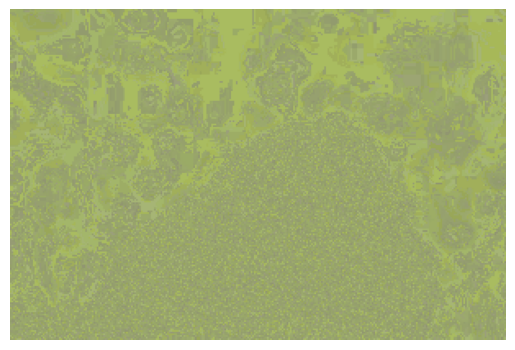

In [32]:
compressed_image_reshaped = np.reshape(bird_image.data, baby_bird_image.shape)
plt.imshow(compressed_image_reshaped)
plt.axis('off')
plt.show()

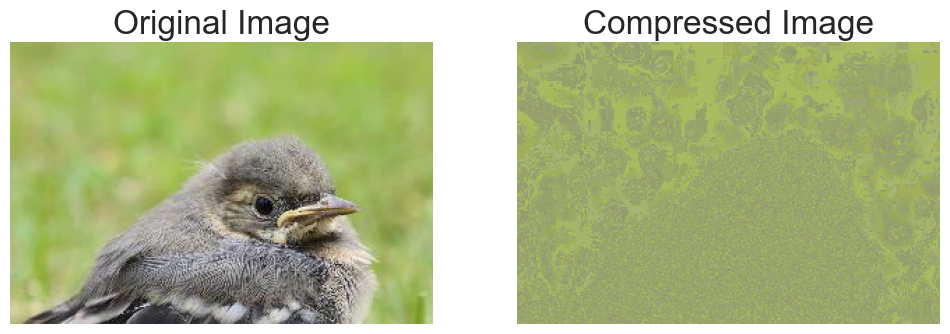

In [33]:
# Plotting both images side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot original image
ax[0].imshow(baby_bird_image)
ax[0].axis('off')
ax[0].set_title('Original Image')

# Plot compressed image
ax[1].imshow(compressed_image_reshaped)
ax[1].axis('off')
ax[1].set_title('Compressed Image')

plt.show()

### Run K-means and compress another image

Note: Smaller images run a lot faster.

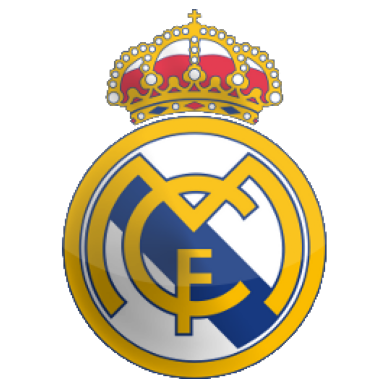

In [20]:
real_madrid_image = imread('data/real_madrid.jpg')

plt.imshow(real_madrid_image)
plt.axis("off")
plt.show()

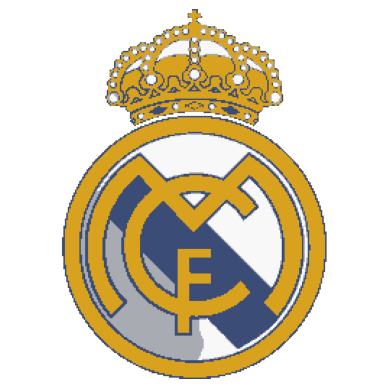

In [11]:
real_madrid_image = imread('data/real_madrid.jpg')
madrid_flattened_image = flatten(real_madrid_image)
np.random.seed(0)

k=5
madrid_image = kmeans.KMeans(madrid_flattened_image)
madrid_image_init_centroids = madrid_image.initialize(k)
madrid_image_new_labels = madrid_image.update_labels(madrid_image_init_centroids)
madrid_image_new_centroids, madrid_image_diff_from_prev_centroids = madrid_image.update_centroids(k, madrid_image_new_labels, madrid_image_init_centroids)
madrid_image.cluster(k=k, max_iter=20)
madrid_image.replace_color_with_centroid()
madrid_compressed_image_reshaped = np.reshape(madrid_image.data, real_madrid_image.shape)
plt.imshow(madrid_compressed_image_reshaped)
plt.axis('off')
plt.show()

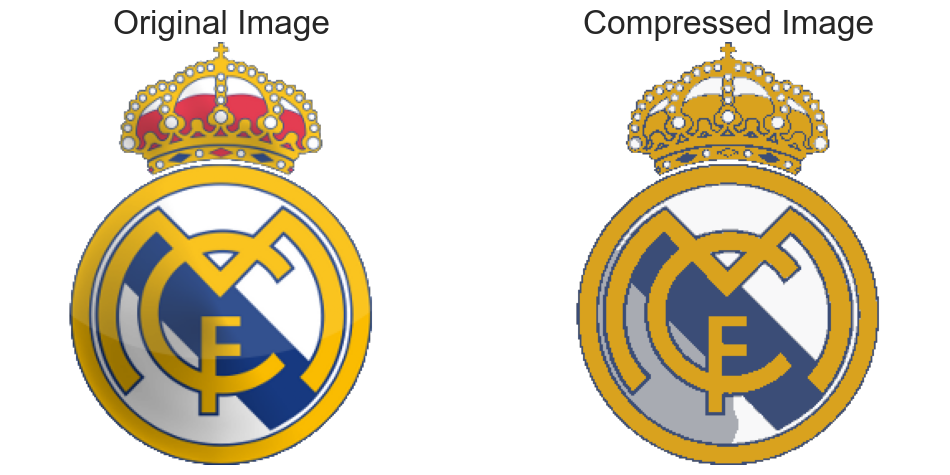

In [25]:
# Plotting both images side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot original image
ax[0].imshow(real_madrid_image)
ax[0].axis('off')
ax[0].set_title('Original Image')

# Plot compressed image
ax[1].imshow(madrid_compressed_image_reshaped)
ax[1].axis('off')
ax[1].set_title('Compressed Image')

plt.show()

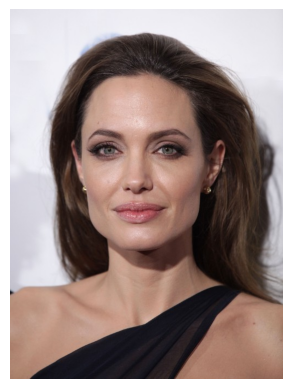

In [21]:
angelina_jolie_image = imread('data/angelina_jolie.jpg')

plt.imshow(angelina_jolie_image)
plt.axis("off")
plt.show()

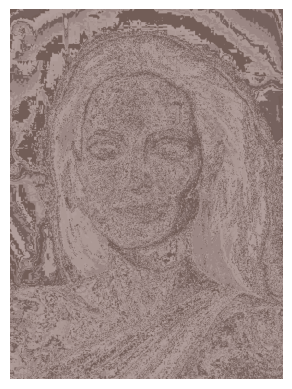

In [19]:
angelina_jolie_image = imread('data/angelina_jolie.jpg')
angelina_flattened_image = flatten(angelina_jolie_image)
np.random.seed(0)

k=5
angelina_image = kmeans.KMeans(angelina_flattened_image)
angelina_image_init_centroids = angelina_image.initialize(k)
angelina_image_new_labels = angelina_image.update_labels(angelina_image_init_centroids)
angelina_image_new_centroids, angelina_image_diff_from_prev_centroids = angelina_image.update_centroids(k, angelina_image_new_labels, angelina_image_init_centroids)
angelina_image.cluster(k=k, max_iter=20)
angelina_image.replace_color_with_centroid()
angelina_compressed_image_reshaped = np.reshape(angelina_image.data, angelina_jolie_image.shape)
plt.imshow(angelina_compressed_image_reshaped)
plt.axis('off')
plt.show()

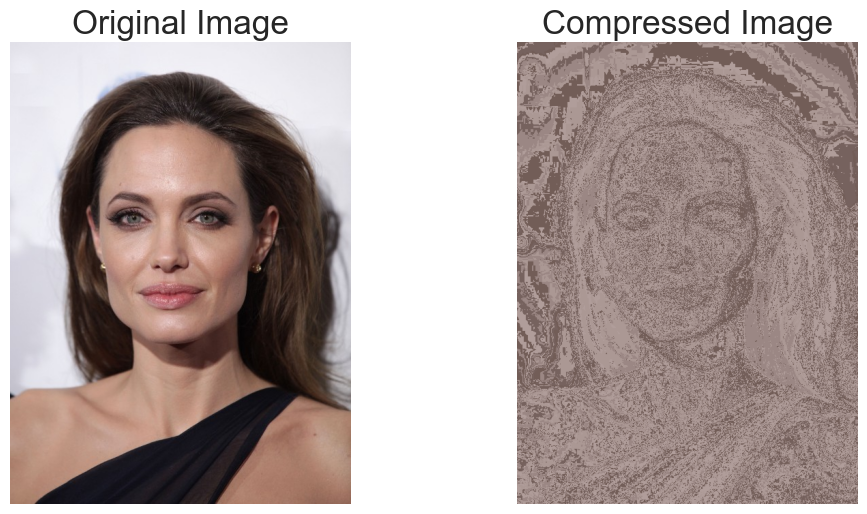

In [27]:
# Plotting both images side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot original image
ax[0].imshow(angelina_jolie_image)
ax[0].axis('off')
ax[0].set_title('Original Image')

# Plot compressed image
ax[1].imshow(angelina_compressed_image_reshaped)
ax[1].axis('off')
ax[1].set_title('Compressed Image')

plt.show()